# Problem 8 
Consider a binary classification problem in which X is uniformly distributed in [0, 1]d and ⌘(x) = (1/d)
Pdi
=1 xi (where x1, . . . ,xd 2 [0, 1] are the components of x). Compute the
asymptotic risk of the 1-nearest neighbor rule.
Write a program that generates training data of n i.i.d. pairs (X1, Y1), . . . , (Xn, Yn) according
to the distribution above. Classify X using the 1, 3, 5, 7, 9-nearest neighbor rules. Re-draw (X, Y )
many times so that you can estimate the risk of these rules.
Try this for various values of n and d and plot the estimated risk. Compare the estimated risk
to the asymptotic risk of the 1-nearest neighbor rule.

In [5]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation

# grey background
sns.set(style="darkgrid")

In [6]:
def generate_data_unif(n, d):
    data = np.empty([n,d])
    y = np.empty([n,1])
    rowkey = np.empty([n,1])
    columns = ['x'+str(x) for x in range(1,d+1)]
    for x in range(n):
        data[x] = np.random.uniform(0,1,d)
        rowkey[x]=x
        x_avg = sum(data[x])/d
        if x_avg>np.random.uniform(0,1,1): 
            y[x]=1 
        else: 
            y[x]=0
    return data, y, columns, rowkey

def get_nn(data_nn, num_nn, columns):
    nns = []
    nn_index = []
    point = []
    dist = squareform(pdist(data_nn[columns],'euclidean'))
    dist_ranked = dist.argsort(axis=1)
    for row in range(len(data_nn)):
        for nn in range(num_nn):
            point.append(row)
            nn_index.append('n'+ str(nn+1))
            nn_col = dist_ranked[:,nn+1]
            nns.append(data_nn.iloc[nn_col[row]])
    return nns, point, nn_index

def plot_points(data_plot, nns, i, num_nn):
    for j in range(num_nn):
        g = sns.scatterplot(x=data_plot['x1'], y=data_plot['x2'], hue=data_plot['y'], palette={'gray', 'black'}, legend=False);
        plt.scatter(x=data_plot['x1'][i], y=data_plot['x2'][i], color="green",facecolors='none',s=200);
        plt.scatter(x=nns['x1'][i*(num_nn)+j], y=nns['x2'][i*(num_nn)+j], color="red",facecolors='none',s=200);

def get_error(n,d,num_nn,exps):
    error = 0
    for i in range(exps):
        data_np, y, columns, rowkey = generate_data_unif(n, d)
        data = pd.DataFrame(data_np)
        y = pd.DataFrame(y)
        data = pd.concat([data, y], axis=1)
        data.columns = columns + ['y']
        data['key'] = range(0, len(data))

        nns, point, nn_index = get_nn(data, num_nn, columns)
        nns = pd.DataFrame(nns)
        nns.reset_index(inplace=True)
        nns['key'] = point
        nns['nn'] = nn_index

        nns_majority = nns[['key','y']].groupby(['key']).mean().reset_index()
        nns_majority['pred_y'] = round(nns_majority['y'])
        data = pd.merge(left=data, right=nns_majority[['key','pred_y']], how='left', left_on='key', right_on='key')
        data['error_flag'] = data['y']!=data['pred_y']

        error = error + (data['error_flag'].sum()/n)
    return error/exps


In [7]:
exps = 50
n = [100,200,300,400]
d = [1,2,5,50,100]
num_nn = [1,3,5,7,9]
errors = pd.DataFrame()

for sample_size in n:
    for dimension in d:
        for neighbors in num_nn:
            error = get_error(sample_size,dimension,neighbors,exps)
            errors = errors.append(pd.DataFrame([[sample_size,dimension,neighbors,error]]))
errors.columns = ['n','d','nn','error']
errors.reset_index(inplace=True)

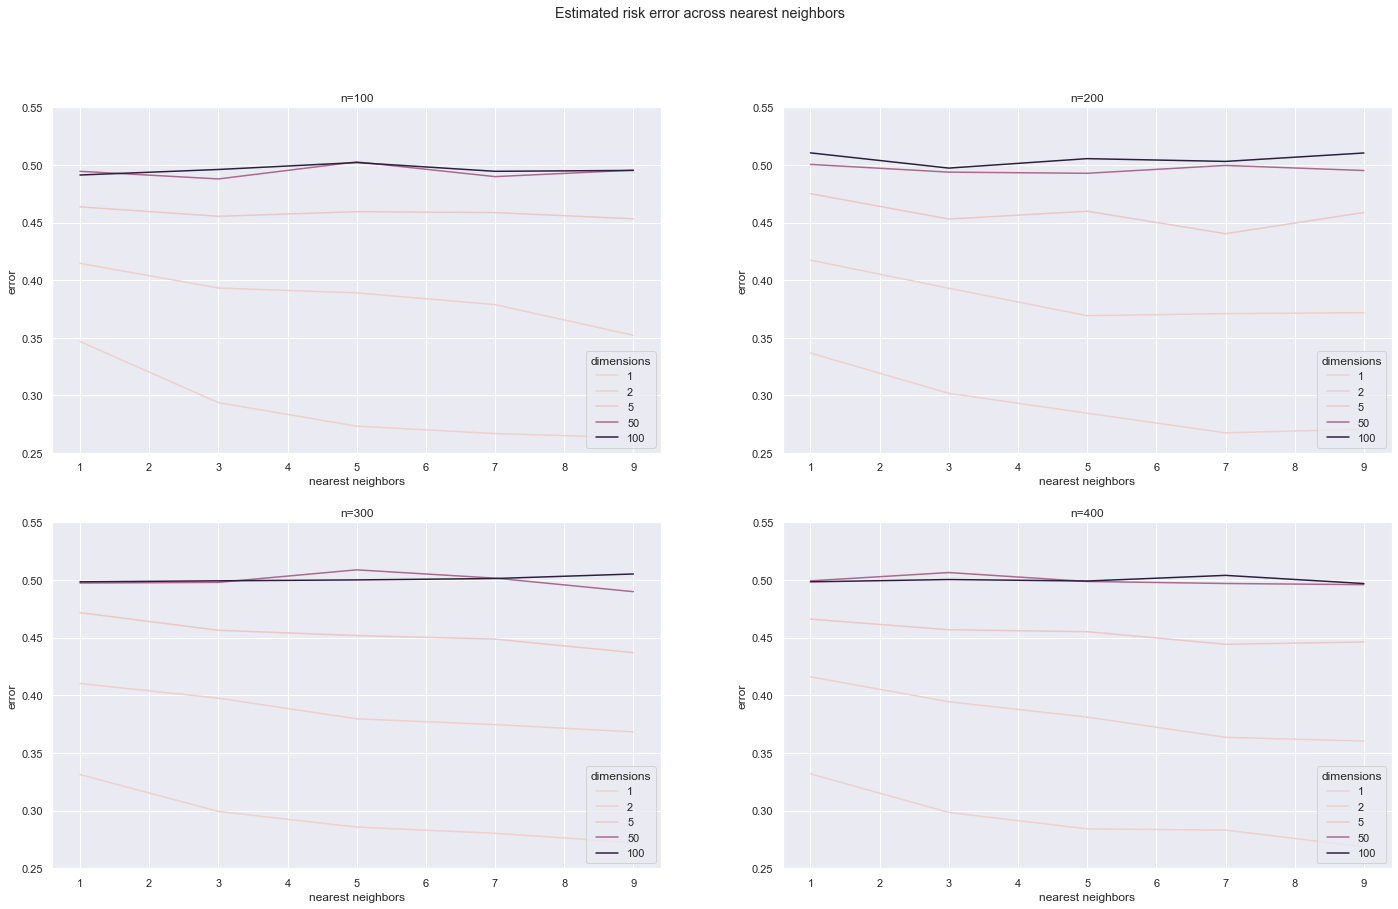

<Figure size 640x480 with 0 Axes>

In [52]:
# Very ugly code to graph the different cases (can be redone in a loop)
from matplotlib.pyplot import figure
fig1, ax1 = plt.subplots(2, 2, figsize=(24,14))
figure(figsize=(8, 6), dpi=80)
fig1.suptitle('Estimated risk error across nearest neighbors')
ax1[0,0].set_title(label = 'n=100')
ax1[0,1].set_title(label = 'n=200')
ax1[1,0].set_title(label = 'n=300')
ax1[1,1].set_title(label = 'n=400')
p1 = sns.lineplot(data=errors[errors.n==100], ax=ax1[0,0], y='error', x='nn', hue='d');
p2 = sns.lineplot(data=errors[errors.n==200], ax=ax1[0,1], y='error', x='nn', hue='d');
p3 = sns.lineplot(data=errors[errors.n==300], ax=ax1[1,0], y='error', x='nn', hue='d');
p4 = sns.lineplot(data=errors[errors.n==400], ax=ax1[1,1], y='error', x='nn', hue='d');
p1.set_ylim(0.25,0.55)
p2.set_ylim(0.25,0.55)
p3.set_ylim(0.25,0.55)
p4.set_ylim(0.25,0.55);
p1.set_xlabel("nearest neighbors")
p2.set_xlabel("nearest neighbors")
p3.set_xlabel("nearest neighbors")
p4.set_xlabel("nearest neighbors")
p1.legend(loc='lower right')
p2.legend(loc='lower right')
p3.legend(loc='lower right')
p4.legend(loc='lower right');
p1.legend(title='dimensions',loc='lower right');
p2.legend(title='dimensions',loc='lower right');
p3.legend(title='dimensions',loc='lower right');
p4.legend(title='dimensions',loc='lower right');

In [53]:
fig1.savefig('./error_by_nn')

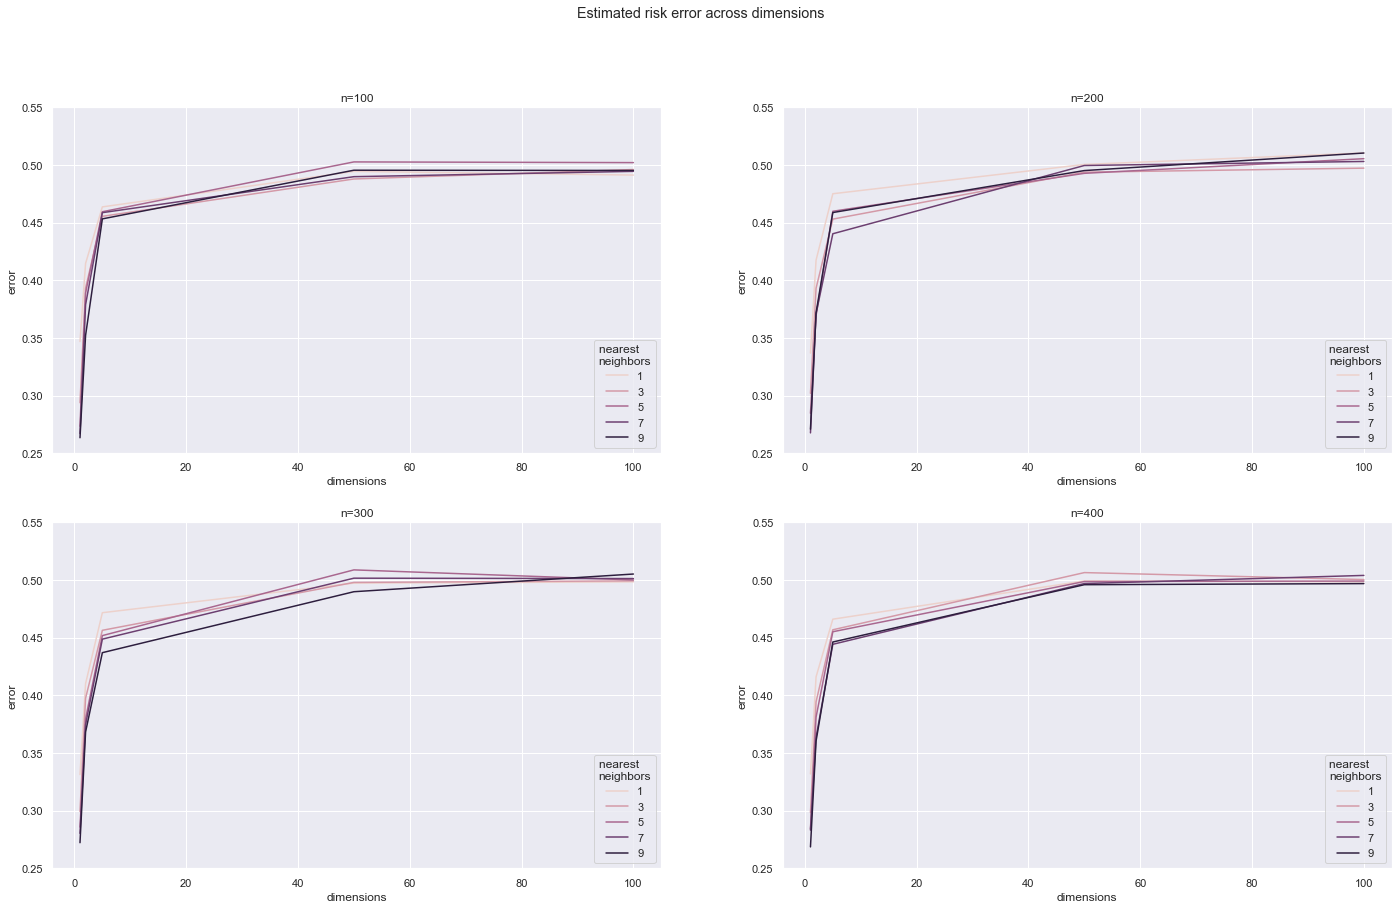

<Figure size 640x480 with 0 Axes>

In [54]:
fig1, ax1 = plt.subplots(2, 2, figsize=(24,14))
figure(figsize=(8, 6), dpi=80)
fig1.suptitle('Estimated risk error across dimensions')
ax1[0,0].set_title(label = 'n=100')
ax1[0,1].set_title(label = 'n=200')
ax1[1,0].set_title(label = 'n=300')
ax1[1,1].set_title(label = 'n=400')
p1 = sns.lineplot(data=errors[errors.n==100], ax=ax1[0,0], y='error', x='d', hue='nn');
p2 = sns.lineplot(data=errors[errors.n==200], ax=ax1[0,1], y='error', x='d', hue='nn');
p3 = sns.lineplot(data=errors[errors.n==300], ax=ax1[1,0], y='error', x='d', hue='nn');
p4 = sns.lineplot(data=errors[errors.n==400], ax=ax1[1,1], y='error', x='d', hue='nn');
p1.set_ylim(0.25,0.55)
p2.set_ylim(0.25,0.55)
p3.set_ylim(0.25,0.55)
p4.set_ylim(0.25,0.55);
p1.set_xlabel("dimensions")
p2.set_xlabel("dimensions")
p3.set_xlabel("dimensions")
p4.set_xlabel("dimensions")
p1.legend(title='nearest \nneighbors',loc='lower right');
p2.legend(title='nearest \nneighbors',loc='lower right');
p3.legend(title='nearest \nneighbors',loc='lower right');
p4.legend(title='nearest \nneighbors',loc='lower right');


In [55]:
fig1.savefig('./error_by_dimension')

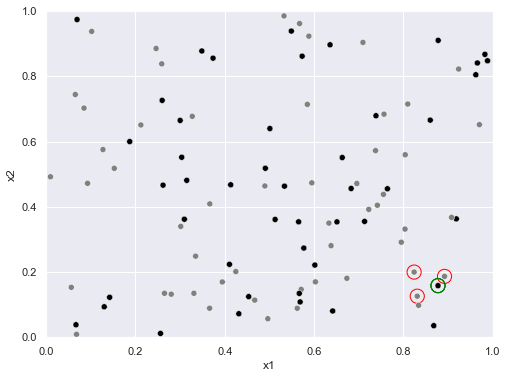

In [56]:
# BONUS: graphic game to plot nns with d=2
import warnings
warnings.filterwarnings('ignore')

data_plot, y_plot, columns, rowkey = generate_data_unif(100, 2)
data_plot = pd.DataFrame(data_plot)
y_plot = pd.DataFrame(y)
data_plot = pd.concat([data_plot, y_plot], axis=1)
data_plot.columns = columns + ['y']
nns_plot, point, nn_index = get_nn(data_plot, 3, ['x1','x2'])
nns_plot = pd.DataFrame(nns_plot)
nns_plot.reset_index(inplace=True)
nns_plot['key'] = point
nns_plot['nn'] = nn_index

for i in range(len(data_plot)):
    fig = plt.figure(figsize=(8, 6));
    anim = FuncAnimation(fig, plot_points(data_plot, nns_plot, i, 3));
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show();
    time.sleep(1)
    clear_output(wait=True);
